In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Student-Pass-Fail-Data.csv')
df.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

scaler = MinMaxScaler()
X = df.drop('Pass_Or_Fail', axis = 1)
Y = tf.keras.utils.to_categorical(df.Pass_Or_Fail.to_numpy())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

2024-05-13 01:14:15.547560: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 01:14:15.573267: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 01:14:16.036473: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


(800, 2) (800, 2)
(200, 2) (200, 2)


In [3]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
input_shape = [X_train.shape[1]]
inputs = keras.Input(shape=input_shape)
h = keras.layers.Dense(4, activation='relu')(inputs)
output = keras.layers.Dense(2, activation='softmax')(h)

func_model = keras.Model(inputs=inputs, outputs=output)
func_model.summary()

2024-05-13 01:14:16.348561: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-13 01:14:16.378223: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# functional model compile 하기
rmsprop = keras.optimizers.RMSprop(0.005)
func_model.compile(optimizer = rmsprop, 
                   loss = keras.losses.BinaryCrossentropy(from_logits=True), 
                   metrics=['acc'])

epochs = 120
batch_size = 1024

# functional model 학습
history = func_model.fit(X_train, Y_train,
                            #batch_size = batch_size,
                            epochs = epochs,
                            validation_split=0.1,
                            verbose=1)

Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5169 - loss: 0.7037 - val_acc: 0.4250 - val_loss: 0.6911
Epoch 2/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - acc: 0.5119 - loss: 0.6729 - val_acc: 0.6375 - val_loss: 0.6646
Epoch 3/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - acc: 0.6918 - loss: 0.6504 - val_acc: 0.8250 - val_loss: 0.6412
Epoch 4/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - acc: 0.8219 - loss: 0.6276 - val_acc: 0.9250 - val_loss: 0.6163
Epoch 5/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - acc: 0.9564 - loss: 0.5998 - val_acc: 0.9750 - val_loss: 0.5912
Epoch 6/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - acc: 0.9691 - loss: 0.5727 - val_acc: 0.9750 - val_loss: 0.5668
Epoch 7/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - acc: 0.9698 - loss: 0.5521 - val_acc: 0.9750 - val_loss: 0.5409
Epoch 8/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.9770 - loss: 0.5166 - val_acc: 0.9750 - val_loss: 0.5089
Epoch 9/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - acc: 0.97

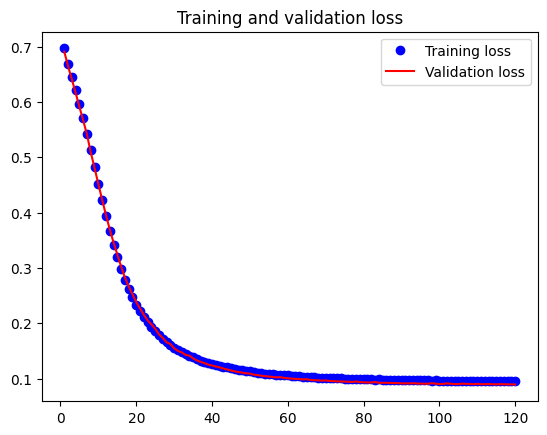

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import accuracy_score

test_score = func_model.evaluate(X_test, Y_test, verbose = 2)
print(f'Test loss: {test_score[0]:.3f}')
print(f'Test accuracy: {test_score[1]:.3f}')

7/7 - 0s - 2ms/step - acc: 0.9700 - loss: 0.0773
Test loss: 0.077
Test accuracy: 0.970
